In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
#load dataset
data=pd.read_csv('image_labels_paths.csv')
data.head()

,Fractured,Non-Fractured
0,Image/Augmented Dataset\Fractured\Fractured_00...,Image/Augmented Dataset\Non-Fractured\Non-Frac...
1,Image/Augmented Dataset\Fractured\Fractured_00...,Image/Augmented Dataset\Non-Fractured\Non-Frac...
2,Image/Augmented Dataset\Fractured\Fractured_00...,Image/Augmented Dataset\Non-Fractured\Non-Frac...
3,Image/Augmented Dataset\Fractured\Fractured_00...,Image/Augmented Dataset\Non-Fractured\Non-Frac...
4,Image/Augmented Dataset\Fractured\Fractured_00...,Image/Augmented Dataset\Non-Fractured\Non-Frac...


In [3]:
data['Fractured']

0       Image/Augmented Dataset\Fractured\Fractured_00...
1       Image/Augmented Dataset\Fractured\Fractured_00...
2       Image/Augmented Dataset\Fractured\Fractured_00...
3       Image/Augmented Dataset\Fractured\Fractured_00...
4       Image/Augmented Dataset\Fractured\Fractured_00...
                              ...                        
4645    Image/Augmented Dataset\Fractured\Fractured_99...
4646    Image/Augmented Dataset\Fractured\Fractured_99...
4647    Image/Augmented Dataset\Fractured\Fractured_99...
4648    Image/Augmented Dataset\Fractured\Fractured_99...
4649    Image/Augmented Dataset\Fractured\Fractured_99...
Name: Fractured, Length: 4650, dtype: object

In [4]:
#Def image processing

def image_processing(img_path):
    img=cv2.imread(img_path)
    plt.imshow(img)
    
    #convert to rgb
    img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    #resize to 100*100
    img_resize=cv2.resize(img_rgb, (100,100))
    plt.imshow(img_resize)
    #convert to numpy array
    img_arr=np.array(img_resize).flatten()
    #convert to dataframe
    img_df=pd.DataFrame(img_arr).T
    return img_df
   


,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


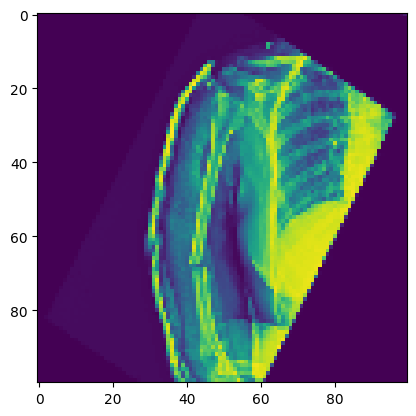

In [5]:
image_processing(data['Fractured'][0])

In [6]:
final_df=pd.DataFrame()

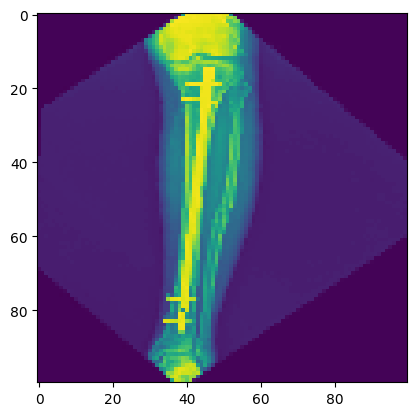

In [7]:
for img in data['Fractured']:
    df_x=image_processing(img)
    final_df=pd.concat([final_df,df_x])
final_df['label']='Fractured'
            

In [8]:
final_dfx=pd.DataFrame()

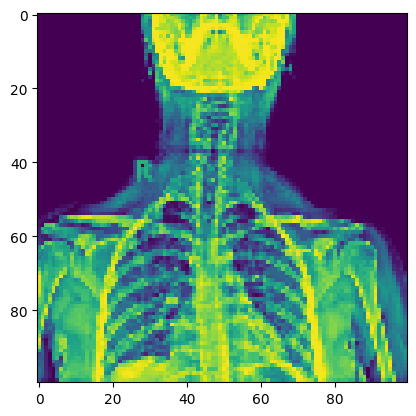

In [9]:
for img in data['Non-Fractured']:
    df_x=image_processing(img)
    final_dfx=pd.concat([final_dfx,df_x])
final_dfx['label']='Non-Fractured'

In [10]:
final_df.index=range(len(final_df))


In [11]:
final_dfx.index=range(len(final_dfx))

In [12]:
# final_df.to_csv('bone_fractured_unlabelled.csv',index='False')

In [13]:
final_df

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fractured
1,26,26,24,21,21,21,21,21,21,21,...,32,33,31,31,32,34,33,36,32,Fractured
2,0,0,0,0,0,0,8,9,17,23,...,0,0,0,0,0,0,0,0,0,Fractured
3,0,0,0,0,0,0,0,0,0,0,...,189,175,166,152,144,139,145,153,173,Fractured
4,0,0,0,0,0,0,0,0,4,6,...,0,0,0,1,2,1,4,106,211,Fractured
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4645,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,Fractured
4646,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fractured
4647,0,0,1,39,53,132,142,156,173,184,...,32,33,31,33,32,35,32,33,31,Fractured
4648,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,Fractured


In [14]:
final_dfx

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,label
0,21,21,21,21,21,21,21,21,20,19,...,21,21,21,21,21,21,21,21,21,Non-Fractured
1,0,0,0,0,0,0,0,0,0,0,...,21,20,20,20,20,20,20,21,0,Non-Fractured
2,185,181,179,174,162,167,168,169,171,170,...,234,224,169,113,15,0,0,20,34,Non-Fractured
3,115,118,120,118,118,120,121,122,121,120,...,77,76,74,70,64,52,44,36,33,Non-Fractured
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Non-Fractured
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4645,6,6,6,6,6,6,6,6,6,6,...,18,18,18,18,18,18,18,18,18,Non-Fractured
4646,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Non-Fractured
4647,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Non-Fractured
4648,16,16,16,16,16,16,28,103,116,119,...,36,25,16,16,16,16,16,16,16,Non-Fractured


In [15]:
final_df.shape

(4650, 10001)

In [16]:
final_dfx.shape

(4650, 10001)

In [17]:
# concating final_df and final_dfx
final_images_df=pd.concat([final_df,final_dfx])

In [21]:
final_images_df.to_csv('final_images_df.csv', index=False)
